In [14]:
import sys
import importlib
import gc
import glob
import random
from itertools import combinations

import numpy as np
import sklearn
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

import pyemma
import msmtools
import mdtraj as md

import ivac
import extq

In [2]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import plotting

In [3]:
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots

In [4]:
cm_seq = sns.cubehelix_palette(
    start=0, rot=-0.70, gamma=0.40, light=0.9, dark=0.1, as_cmap=True, reverse=True
)
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("", colors)

# Featurize data

In [5]:
feat2 = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
pair_indices = np.loadtxt("../../data/feat3_atom_indices.txt", dtype=np.int32)
feat2.add_distances(pair_indices)

In [6]:
feat2.describe()

['DIST: ARG 217 CA 1768 - ASP 129 CA 406',
 'DIST: ARG 217 CA 1768 - ASP 136 CA 530',
 'DIST: ARG 217 CA 1768 - ASP 151 CA 751',
 'DIST: ARG 217 CA 1768 - ASP 164 CA 944',
 'DIST: ARG 217 CA 1768 - GLU 183 CA 1258',
 'DIST: ARG 217 CA 1768 - ASP 186 CA 1299',
 'DIST: ARG 223 CA 1872 - ASP 129 CA 406',
 'DIST: ARG 223 CA 1872 - ASP 136 CA 530',
 'DIST: ARG 223 CA 1872 - ASP 151 CA 751',
 'DIST: ARG 223 CA 1872 - ASP 164 CA 944',
 'DIST: ARG 223 CA 1872 - GLU 183 CA 1258',
 'DIST: ARG 223 CA 1872 - ASP 186 CA 1299',
 'DIST: ARG 226 CA 1934 - ASP 129 CA 406',
 'DIST: ARG 226 CA 1934 - ASP 136 CA 530',
 'DIST: ARG 226 CA 1934 - ASP 151 CA 751',
 'DIST: ARG 226 CA 1934 - ASP 164 CA 944',
 'DIST: ARG 226 CA 1934 - GLU 183 CA 1258',
 'DIST: ARG 226 CA 1934 - ASP 186 CA 1299',
 'DIST: ARG 229 CA 1990 - ASP 129 CA 406',
 'DIST: ARG 229 CA 1990 - ASP 136 CA 530',
 'DIST: ARG 229 CA 1990 - ASP 151 CA 751',
 'DIST: ARG 229 CA 1990 - ASP 164 CA 944',
 'DIST: ARG 229 CA 1990 - GLU 183 CA 1258',
 'DI

In [22]:
xtc_files = []
for i in range(3, 14):
    xtc_files.append(f"/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")

In [23]:
xtc_files

['/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.3.xtc',
 '/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.4.xtc',
 '/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.5.xtc',
 '/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.6.xtc',
 '/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.7.xtc',
 '/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.8.xtc',
 '/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.9.xtc',
 '/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.10.xtc',
 '/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.11.xtc',
 '/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.12.xtc',
 '/project2/roux/scguo/ci-vsd/anton2/prot/civsd.prot.13.xtc']

In [24]:
feat2_raw = pyemma.coordinates.load(xtc_files, features=feat2, chunksize=128)

In [25]:
print(len(feat2_raw), feat2_raw[0].shape)

11 (10001, 60)


In [26]:
np.save("/project2/roux/scguo/ci-vsd/data/raw_feat/feat2_raw_anton2.npy", feat2_raw)

In [7]:
feat3_tors = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
feat3_tors.add_backbone_torsions(selstr="protein and residue 204 to 238")

In [8]:
feat3_tors.describe()

['PHI 0 ASP 204',
 'PSI 0 ASP 204',
 'PHI 0 GLU 205',
 'PSI 0 GLU 205',
 'PHI 0 TYR 206',
 'PSI 0 TYR 206',
 'PHI 0 VAL 207',
 'PSI 0 VAL 207',
 'PHI 0 GLN 208',
 'PSI 0 GLN 208',
 'PHI 0 GLU 209',
 'PSI 0 GLU 209',
 'PHI 0 THR 210',
 'PSI 0 THR 210',
 'PHI 0 GLY 211',
 'PSI 0 GLY 211',
 'PHI 0 ALA 212',
 'PSI 0 ALA 212',
 'PHI 0 ASP 213',
 'PSI 0 ASP 213',
 'PHI 0 GLY 214',
 'PSI 0 GLY 214',
 'PHI 0 LEU 215',
 'PSI 0 LEU 215',
 'PHI 0 GLY 216',
 'PSI 0 GLY 216',
 'PHI 0 ARG 217',
 'PSI 0 ARG 217',
 'PHI 0 LEU 218',
 'PSI 0 LEU 218',
 'PHI 0 VAL 219',
 'PSI 0 VAL 219',
 'PHI 0 VAL 220',
 'PSI 0 VAL 220',
 'PHI 0 LEU 221',
 'PSI 0 LEU 221',
 'PHI 0 ALA 222',
 'PSI 0 ALA 222',
 'PHI 0 ARG 223',
 'PSI 0 ARG 223',
 'PHI 0 LEU 224',
 'PSI 0 LEU 224',
 'PHI 0 LEU 225',
 'PSI 0 LEU 225',
 'PHI 0 ARG 226',
 'PSI 0 ARG 226',
 'PHI 0 VAL 227',
 'PSI 0 VAL 227',
 'PHI 0 VAL 228',
 'PSI 0 VAL 228',
 'PHI 0 ARG 229',
 'PSI 0 ARG 229',
 'PHI 0 LEU 230',
 'PSI 0 LEU 230',
 'PHI 0 ALA 231',
 'PSI 0 AL

In [29]:
feat3_raw = pyemma.coordinates.load(xtc_files, features=feat3_tors, chunksize=32)

In [30]:
np.save(
    "/project2/roux/scguo/ci-vsd/data/raw_feat/feat3_torsions_anton2.npy", feat3_raw
)

In [11]:
feat4 = pyemma.coordinates.featurizer("/project/dinner/scguo/ci-vsd/civsd-pro.pdb")
pair_indices4 = np.loadtxt(
    "/project/dinner/scguo/ci-vsd/data/feat4_atom_indices.txt",
    dtype=np.int32,
)
feat4.add_residue_mindist(
    residue_pairs=pair_indices4, scheme="closest-heavy", threshold=0.45, periodic=False
)
print(len(feat4.describe()))

1924


In [ ]:
feat4_raw = pyemma.coordinates.load(xtc_files, features=feat4, chunksize=128)

In [ ]:
feat4_raw[0].shape

In [ ]:
with open(
    "/project2/roux/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz", mode="wb+"
) as f:
    np.savez_compressed(f, feat2_raw)

## New 3.15.22

In [10]:
xtc_files = []
for i in range(55, 63):
    xtc_files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")

In [11]:
xtc_files

['/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.55.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.56.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.57.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.58.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.59.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.60.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.61.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.62.xtc']

In [12]:
feat2_raw = pyemma.coordinates.load(xtc_files, features=feat2, chunksize=128)

100%|██████████| 632/632 [00:14<00:00, 43.53it/s]                                 


In [13]:
print(len(feat2_raw), feat2_raw[0].shape)

8 (10001, 60)


In [28]:
feat2_raw_old = list(np.load("../../data/raw_feat/feat2_raw_anton2.npy"))

In [29]:
feat2_raw_old.extend(feat2_raw)
print(len(feat2_raw_old))

60


In [31]:
np.save("/project/dinner/scguo/ci-vsd/data/raw_feat/feat2_raw_anton2.npy", feat2_raw_old)

In [32]:
feat3_tors = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
feat3_tors.add_backbone_torsions(selstr="protein and residue 204 to 238")

In [33]:
feat3_raw = pyemma.coordinates.load(xtc_files, features=feat3_tors, chunksize=32)

100%|██████████| 2504/2504 [00:16<00:00, 149.70it/s]                                 


In [36]:
feat3_raw_old = list(np.load("../../data/raw_feat/feat3_torsions_anton2.npy"))
print(len(feat3_raw_old))

52


In [38]:
feat3_raw_old.extend(feat3_raw)
print(len(feat2_raw_old))

60


In [40]:
np.save(
    "/project/dinner/scguo/ci-vsd/data/raw_feat/feat3_torsions_anton2.npy", feat3_raw_old
)

In [43]:
feat4 = pyemma.coordinates.featurizer("/project/dinner/scguo/ci-vsd/civsd-pro.pdb")
pair_indices4 = np.loadtxt(
    "/project/dinner/scguo/ci-vsd/data/feat4_atom_indices.txt",
    dtype=np.int32,
)
feat4.add_residue_mindist(
    residue_pairs=pair_indices4, scheme="closest-heavy", threshold=0.45, periodic=False
)
print(len(feat4.describe()))

1924


In [44]:
feat4_raw = pyemma.coordinates.load(xtc_files, features=feat4, chunksize=128)

100%|██████████| 632/632 [02:27<00:00,  4.27it/s]                                 


In [45]:
feat4_raw[0].shape

(10001, 1924)

In [49]:
with np.load("/project/dinner/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz") as f:
    feat4_raw_old = list(f['arr_0'])

In [50]:
len(feat4_raw_old)

52

In [51]:
feat4_raw_old.extend(feat4_raw)
print(len(feat4_raw_old))

60


In [52]:
with open(
    "/project/dinner/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz", mode="wb+"
) as f:
    np.savez_compressed(f, feat4_raw_old)

## New 3.17.22

In [7]:
xtc_files = []
for i in range(63, 82):
    xtc_files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")

In [8]:
xtc_files

['/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.63.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.64.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.65.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.66.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.67.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.68.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.69.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.70.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.71.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.72.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.73.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.74.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.75.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.76.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.77.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.7

In [9]:
feat2_raw = pyemma.coordinates.load(xtc_files, features=feat2, chunksize=128)

100%|██████████| 1501/1501 [00:34<00:00, 43.35it/s]                                 


In [10]:
print(len(feat2_raw), feat2_raw[0].shape)

19 (10001, 60)


In [11]:
feat2_raw_old = list(np.load("../../data/raw_feat/feat2_raw_anton2.npy"))

In [12]:
feat2_raw_old.extend(feat2_raw)
print(len(feat2_raw_old))

79


In [13]:
np.save("/project/dinner/scguo/ci-vsd/data/raw_feat/feat2_raw_anton2.npy", feat2_raw_old)

In [14]:
feat3_tors = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
feat3_tors.add_backbone_torsions(selstr="protein and residue 204 to 238")

In [15]:
feat3_raw = pyemma.coordinates.load(xtc_files, features=feat3_tors, chunksize=32)

100%|██████████| 5947/5947 [00:38<00:00, 155.00it/s]                                 


In [16]:
feat3_raw_old = list(np.load("../../data/raw_feat/feat3_torsions_anton2.npy"))
print(len(feat3_raw_old))

60


In [17]:
feat3_raw_old.extend(feat3_raw)
print(len(feat2_raw_old))

79


In [18]:
np.save(
    "/project/dinner/scguo/ci-vsd/data/raw_feat/feat3_torsions_anton2.npy", feat3_raw_old
)

In [19]:
feat4 = pyemma.coordinates.featurizer("/project/dinner/scguo/ci-vsd/civsd-pro.pdb")
pair_indices4 = np.loadtxt(
    "/project/dinner/scguo/ci-vsd/data/feat4_atom_indices.txt",
    dtype=np.int32,
)
feat4.add_residue_mindist(
    residue_pairs=pair_indices4, scheme="closest-heavy", threshold=0.45, periodic=False
)
print(len(feat4.describe()))

1924


In [20]:
feat4_raw = pyemma.coordinates.load(xtc_files, features=feat4, chunksize=128)

100%|██████████| 1501/1501 [05:52<00:00,  4.26it/s]                                 


In [21]:
feat4_raw[0].shape

(10001, 1924)

In [22]:
with np.load("/project/dinner/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz") as f:
    feat4_raw_old = list(f['arr_0'])

In [23]:
len(feat4_raw_old)

60

In [24]:
feat4_raw_old.extend(feat4_raw)
print(len(feat4_raw_old))

79


In [25]:
with open(
    "/project/dinner/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz", mode="wb+"
) as f:
    np.savez_compressed(f, feat4_raw_old)

## New 3.25.22

In [9]:
xtc_files = []
for i in range(83, 119):
    xtc_files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")

In [10]:
xtc_files

['/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.83.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.84.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.85.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.86.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.87.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.88.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.89.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.90.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.91.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.92.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.93.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.94.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.95.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.96.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.97.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.9

In [9]:
feat2_raw = pyemma.coordinates.load(xtc_files, features=feat2, chunksize=128)

100%|██████████| 2844/2844 [01:05<00:00, 43.49it/s]                                 


In [10]:
print(len(feat2_raw), feat2_raw[0].shape)

36 (10001, 60)


In [11]:
feat2_raw_old = list(np.load("../../data/raw_feat/feat2_raw_anton2.npy"))

In [12]:
feat2_raw_old.extend(feat2_raw)
print(len(feat2_raw_old))

115


In [13]:
np.save("/project/dinner/scguo/ci-vsd/data/raw_feat/feat2_raw_anton2.npy", feat2_raw_old)

In [14]:
feat3_tors = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
feat3_tors.add_backbone_torsions(selstr="protein and residue 204 to 238")

In [15]:
feat3_raw = pyemma.coordinates.load(xtc_files, features=feat3_tors, chunksize=32)

100%|██████████| 11268/11268 [01:12<00:00, 154.70it/s]                                 


In [16]:
feat3_raw_old = list(np.load("../../data/raw_feat/feat3_torsions_anton2.npy"))
print(len(feat3_raw_old))

79


In [17]:
feat3_raw_old.extend(feat3_raw)
print(len(feat2_raw_old))

115


In [18]:
np.save(
    "/project/dinner/scguo/ci-vsd/data/raw_feat/feat3_torsions_anton2.npy", feat3_raw_old
)

In [11]:
feat4 = pyemma.coordinates.featurizer("/project/dinner/scguo/ci-vsd/civsd-pro.pdb")
pair_indices4 = np.loadtxt(
    "/project/dinner/scguo/ci-vsd/data/feat4_atom_indices.txt",
    dtype=np.int32,
)
feat4.add_residue_mindist(
    residue_pairs=pair_indices4, scheme="closest-heavy", threshold=0.45, periodic=False
)
print(len(feat4.describe()))

1924


In [ ]:
feat4_raw = pyemma.coordinates.load(xtc_files, features=feat4, chunksize=128)

getting output of FeatureReader:  97%|█████████▋| 2771/2844 [10:42<00:17,  4.26it/s]

In [ ]:
feat4_raw[0].shape

In [14]:
with np.load("/project/dinner/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz") as f:
    feat4_raw_old = list(f['arr_0'])

In [15]:
len(feat4_raw_old)

79

In [16]:
feat4_raw_old.extend(feat4_raw)
print(len(feat4_raw_old))

115


In [17]:
with open(
    "/project/dinner/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz", mode="wb+"
) as f:
    np.savez_compressed(f, feat4_raw_old)

## New 10.24.22

In [12]:
xtc_files = []
for i in range(119, 152):
    xtc_files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")

In [13]:
xtc_files

['/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.119.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.120.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.121.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.122.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.123.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.124.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.125.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.126.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.127.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.128.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.129.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.130.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.131.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.132.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.133.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/pr

In [14]:
feat2_raw = pyemma.coordinates.load(xtc_files, features=feat2, chunksize=128)

Obtaining file info:   0%|          | 0/33 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/2607 [00:00<?, ?it/s]

In [15]:
print(len(feat2_raw), feat2_raw[0].shape)

33 (10001, 60)


In [16]:
feat2_raw_old = list(np.load("../../data/raw_feat/feat2_raw_anton2.npy"))

In [17]:
feat2_raw_old.extend(feat2_raw)
print(len(feat2_raw_old))

148


In [18]:
np.save("/project/dinner/scguo/ci-vsd/data/raw_feat/feat2_raw_anton2.npy", feat2_raw_old)

In [19]:
feat3_tors = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
feat3_tors.add_backbone_torsions(selstr="protein and residue 204 to 238")

In [20]:
feat3_raw = pyemma.coordinates.load(xtc_files, features=feat3_tors, chunksize=32)

Obtaining file info:   0%|          | 0/33 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/10329 [00:00<?, ?it/s]

In [22]:
feat3_raw_old = list(np.load("../../data/raw_feat/feat3_torsions_anton2.npy"))
print(len(feat3_raw_old))

115


In [23]:
feat3_raw_old.extend(feat3_raw)
print(len(feat3_raw_old))

148


In [24]:
np.save(
    "/project/dinner/scguo/ci-vsd/data/raw_feat/feat3_torsions_anton2.npy", feat3_raw_old
)

In [25]:
feat4 = pyemma.coordinates.featurizer("/project/dinner/scguo/ci-vsd/civsd-pro.pdb")
pair_indices4 = np.loadtxt(
    "/project/dinner/scguo/ci-vsd/data/feat4_atom_indices.txt",
    dtype=np.int32,
)
feat4.add_residue_mindist(
    residue_pairs=pair_indices4, scheme="closest-heavy", threshold=0.45, periodic=False
)
print(len(feat4.describe()))

1924


In [26]:
feat4_raw = pyemma.coordinates.load(xtc_files, features=feat4, chunksize=128)

Obtaining file info:   0%|          | 0/33 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/2607 [00:00<?, ?it/s]

In [27]:
feat4_raw[0].shape

(10001, 1924)

In [28]:
with np.load("/project/dinner/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz") as f:
    feat4_raw_old = list(f['arr_0'])

In [29]:
len(feat4_raw_old)

115

In [30]:
feat4_raw_old.extend(feat4_raw)
print(len(feat4_raw_old))

148


In [31]:
with open(
    "/project/dinner/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz", mode="wb+"
) as f:
    np.savez_compressed(f, feat4_raw_old)

## New 11.20.22

In [6]:
xtc_files = []
for i in range(152, 188):
    xtc_files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")

In [7]:
xtc_files

['/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.152.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.153.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.154.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.155.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.156.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.157.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.158.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.159.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.160.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.161.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.162.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.163.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.164.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.165.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.166.xtc',
 '/project/dinner/scguo/ci-vsd/anton2/pr

In [9]:
feat2_raw = pyemma.coordinates.load(xtc_files, features=feat2, chunksize=128)

Obtaining file info:   0%|          | 0/36 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/2844 [00:00<?, ?it/s]

In [10]:
print(len(feat2_raw), feat2_raw[0].shape)

36 (10001, 60)


In [11]:
feat2_raw_old = list(np.load("../../data/raw_feat/feat2_raw_anton2.npy"))

In [12]:
feat2_raw_old.extend(feat2_raw)
print(len(feat2_raw_old))

184


In [13]:
np.save("/project/dinner/scguo/ci-vsd/data/raw_feat/feat2_raw_anton2.npy", feat2_raw_old)

In [14]:
feat3_tors = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
feat3_tors.add_backbone_torsions(selstr="protein and residue 204 to 238")

In [15]:
feat3_raw = pyemma.coordinates.load(xtc_files, features=feat3_tors, chunksize=32)

Obtaining file info:   0%|          | 0/36 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/11268 [00:00<?, ?it/s]

In [16]:
feat3_raw_old = list(np.load("../../data/raw_feat/feat3_torsions_anton2.npy"))
print(len(feat3_raw_old))

148


In [17]:
feat3_raw_old.extend(feat3_raw)
print(len(feat3_raw_old))

184


In [18]:
np.save(
    "/project/dinner/scguo/ci-vsd/data/raw_feat/feat3_torsions_anton2.npy", feat3_raw_old
)

In [8]:
feat4 = pyemma.coordinates.featurizer("/project/dinner/scguo/ci-vsd/civsd-pro.pdb")
pair_indices4 = np.loadtxt(
    "/project/dinner/scguo/ci-vsd/data/feat4_atom_indices.txt",
    dtype=np.int32,
)
feat4.add_residue_mindist(
    residue_pairs=pair_indices4, scheme="closest-heavy", threshold=0.45, periodic=False
)
print(len(feat4.describe()))

1924


In [9]:
feat4_raw = pyemma.coordinates.load(xtc_files, features=feat4, chunksize=128)

Obtaining file info:   0%|          | 0/36 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/2844 [00:00<?, ?it/s]

In [10]:
feat4_raw[0].shape

(10001, 1924)

In [11]:
with np.load("/project/dinner/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz") as f:
    feat4_raw_old = list(f['arr_0'])

In [12]:
len(feat4_raw_old)

148

In [13]:
feat4_raw_old.extend(feat4_raw)
print(len(feat4_raw_old))

184


In [15]:
with open(
    "/project/dinner/scguo/ci-vsd/data/raw_feat/feat5_raw_anton2.npz", mode="wb+"
) as f:
    np.savez_compressed(f, feat4_raw_old)

# Load CV files

In [ ]:
cvs = []
for i in range(3, 14):
    cvs.append(np.loadtxt(f"/project2/roux/scguo/ci-vsd/anton2/cvfiles/ds-{i}.txt"))

In [ ]:
cvs[0].shape

In [ ]:
np.save("/project2/roux/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy", cvs)

In [62]:
cvs = list(np.load("/project/dinner/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy"))
print(len(cvs))

52


In [63]:
for i in range(55, 63):
    cvs.append(np.loadtxt(f"/project/dinner/scguo/ci-vsd/anton2/cvfiles/ds-{i}.txt"))

In [64]:
print(len(cvs))

60


In [65]:
np.save("/project/dinner/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy", cvs)

3.17.22

In [26]:
cvs = list(np.load("/project/dinner/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy"))
print(len(cvs))

60


In [27]:
for i in range(63, 82):
    cvs.append(np.loadtxt(f"/project/dinner/scguo/ci-vsd/anton2/cvfiles/ds-{i}.txt"))

In [28]:
print(len(cvs))

79


In [29]:
np.save("/project/dinner/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy", cvs)

3.25.22

In [25]:
cvs = list(np.load("/project/dinner/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy"))
print(len(cvs))

79


In [26]:
for i in range(83, 119):
    cvs.append(np.loadtxt(f"/project/dinner/scguo/ci-vsd/anton2/cvfiles/ds-{i}.txt"))

In [27]:
print(len(cvs))

115


In [28]:
np.save("/project/dinner/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy", cvs)

10.24.22

In [32]:
cvs = list(np.load("/project/dinner/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy"))
print(len(cvs))

115


In [33]:
for i in range(119, 152):
    cvs.append(np.loadtxt(f"/project/dinner/scguo/ci-vsd/anton2/cvfiles/ds-{i}.txt"))
print(len(cvs))

148


In [34]:
np.save("/project/dinner/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy", cvs)

11.23.22

In [16]:
cvs = list(np.load("/project/dinner/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy"))
print(len(cvs))

148


In [17]:
for i in range(152, 188):
    cvs.append(np.loadtxt(f"/project/dinner/scguo/ci-vsd/anton2/cvfiles/ds-{i}.txt"))
print(len(cvs))

184


In [18]:
np.save("/project/dinner/scguo/ci-vsd/data/raw_feat/cv_dist_spin_anton2.npy", cvs)

# Plot new data

In [35]:
cv_trajs = list(
    np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)
)

In [36]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [37]:
sb_trajs = list(np.load("../../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True))

In [38]:
# add new sampling
cv_trajs.extend(cvs)
sb_trajs.extend(feat2_raw_old)

cv_arr = np.concatenate(cv_trajs)
sb_arr = np.concatenate(sb_trajs)
print(cv_arr.shape, sb_arr.shape)

(4480148, 2) (4480148, 60)


In [39]:
print(len(cv_trajs))

385


In [40]:
random.seed(123)
s = 10
N = len(cv_arr)
inds = random.sample(range(N), N // s)

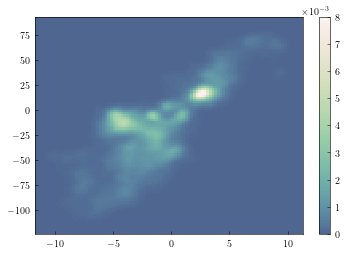

In [41]:
h, xe, ye, _ = plt.hist2d(cv_arr[:, 0], cv_arr[:, 1], bins=100, density=True, cmap=cm_seq, vmax=0.008)
plt.colorbar()

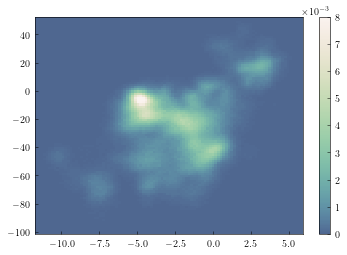

In [42]:
e = 3_000_000
h, xe, ye, _ = plt.hist2d(cv_arr[e:, 0], cv_arr[e:, 1], bins=100, density=True, cmap=cm_seq, vmax=0.008)
plt.colorbar()

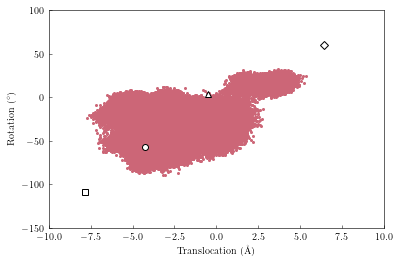

In [44]:
plt.scatter(*np.concatenate(cvs[-33:]).T)
plotting.format_cvs(plt.gca(), ms=6)

# New features

In [27]:
feat6 = pyemma.coordinates.featurizer("../../civsd-pro.pdb")
# pair_indices = np.loadtxt("../../data/feat3_atom_indices.txt", dtype=np.int32)
# feat6.add_distances(pair_indices)
arg = feat6.select("residue 217 223 226 229 232 and name CA CZ")
plug = feat6.select("residue 126 161 190 and name CA")

feat6.add_distances(arg, indices2=plug)

28-03-22 20:32:27 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[9] WARNING  The 1D arrays input for add_distances() have been sorted, and index duplicates have been eliminated.
Check the output of describe() to see the actual order of the features


In [28]:
feat6.describe()

['DIST: ARG 217 CA 1768 - ILE 126 CA 348',
 'DIST: ARG 217 CA 1768 - PHE 161 CA 888',
 'DIST: ARG 217 CA 1768 - ILE 190 CA 1356',
 'DIST: ARG 217 CZ 1781 - ILE 126 CA 348',
 'DIST: ARG 217 CZ 1781 - PHE 161 CA 888',
 'DIST: ARG 217 CZ 1781 - ILE 190 CA 1356',
 'DIST: ARG 223 CA 1872 - ILE 126 CA 348',
 'DIST: ARG 223 CA 1872 - PHE 161 CA 888',
 'DIST: ARG 223 CA 1872 - ILE 190 CA 1356',
 'DIST: ARG 223 CZ 1885 - ILE 126 CA 348',
 'DIST: ARG 223 CZ 1885 - PHE 161 CA 888',
 'DIST: ARG 223 CZ 1885 - ILE 190 CA 1356',
 'DIST: ARG 226 CA 1934 - ILE 126 CA 348',
 'DIST: ARG 226 CA 1934 - PHE 161 CA 888',
 'DIST: ARG 226 CA 1934 - ILE 190 CA 1356',
 'DIST: ARG 226 CZ 1947 - ILE 126 CA 348',
 'DIST: ARG 226 CZ 1947 - PHE 161 CA 888',
 'DIST: ARG 226 CZ 1947 - ILE 190 CA 1356',
 'DIST: ARG 229 CA 1990 - ILE 126 CA 348',
 'DIST: ARG 229 CA 1990 - PHE 161 CA 888',
 'DIST: ARG 229 CA 1990 - ILE 190 CA 1356',
 'DIST: ARG 229 CZ 2003 - ILE 126 CA 348',
 'DIST: ARG 229 CZ 2003 - PHE 161 CA 888',
 'DI

In [29]:
len(feat6.describe())

30

In [32]:
files = []
remove = {1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
}
for i in range(295):
    if (i + 1000) not in remove:
        files.append(f"/project/dinner/scguo/anton-old/xtc1000ns/civsd-{i}.xtc")
for i in range(3, 82):
    files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")
for i in range(83, 119):
    files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")

In [33]:
feat6_raw = pyemma.coordinates.load(files, features=feat6, chunksize=128)

100%|██████████| 32729/32729 [09:36<00:00, 56.81it/s]                                 


In [34]:
len(feat6_raw)

352

In [35]:
np.save("../../data/raw_feat/feat6_old.npy", feat6_raw[:237])
np.save("../../data/raw_feat/feat6_anton2.npy", feat6_raw[237:])

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
